# 4장 머신러닝

In [60]:
%matplotlib inline

In [39]:
from sklearn import svm

In [40]:
# xor-train.py  # 150페이지
from sklearn import svm
# XOR의 계산 결과 데이터 --- (※1)
xor_data = [
    #P, Q, result
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]
# 학습을 위해 데이터와 레이블 분리하기 --- (※2)
data = []
label = []
for row in xor_data:
    p = row[0]
    q = row[1]
    r = row[2]
    data.append([p, q])
    label.append(r)
# 데이터 학습시키기 --- (※3)
clf = svm.SVC()  # SVC : Support Vector Classification
clf.fit(data, label)  # fit 는 훈련
# 데이터 예측하기 --- (※4)
pred = clf.predict(data)  # predict 는 예측
print("예측결과:", pred)  # 예측결과: [0 1 1 0]
# 결과 확인하기 --- (※5)
ok = 0
total = 0
for idx, answer in enumerate(label):
    p = pred[idx]
    if p == answer:
        ok += 1
    total += 1
print("정답률:", ok, "/", total, "=", ok/total)  # 정답률: 4 / 4 = 1.0 # 즉, 100% 성공

예측결과: [0 1 1 0]
정답률: 4 / 4 = 1.0


In [41]:
# xor-train2.py  # 152페이지
import pandas as pd
from sklearn import svm, metrics
# XOR 연산
xor_input = [
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]
# 입력을 학습 전용 데이터와 테스트 전용 데이터로 분류하기 --- (※1)
xor_df = pd.DataFrame(xor_input)

# .ix is deprecated. Please use .loc for label based indexing or .iloc for positional indexing
# xor_data  = xor_df.ix[:,0:1] # 데이터
# xor_label = xor_df.ix[:,2]   # 레이블

xor_data  = xor_df.loc[:,0:1] # 데이터
xor_label = xor_df.loc[:,2]   # 레이블
# 데이터 학습과 예측하기 --- (※2)
clf = svm.SVC()
clf.fit(xor_data, xor_label)
pred = clf.predict(xor_data)
# 정답률 구하기 --- (※3)
ac_score = metrics.accuracy_score(xor_label, pred)
print("정답률 =", ac_score)

정답률 = 1.0


In [42]:
# iris-train.py  # 155페이지
from sklearn import svm, metrics
import random, re
# 붓꽃의 CSV 데이터 읽어 들이기 --- (※1)
csv = []
with open('iris.csv', 'r', encoding='utf-8') as fp:
    # 한 줄씩 읽어 들이기
    for line in fp:
        line = line.strip()    # 줄바꿈 제거
        cols = line.split(',') # 쉼표로 자르기
        # 문자열 데이터를 숫자로 변환하기
        fn = lambda n : float(n) if re.match(r'^[0-9\.]+$', n) else n
        cols = list(map(fn, cols))
        csv.append(cols)
# 가장 앞 줄의 헤더 제거
del csv[0]
# 데이터 셔플하기(섞기) --- (※2)
random.shuffle(csv)
# 학습 전용 데이터와 테스트 전용 데이터 분할하기(2:1 비율) --- (※3)
total_len = len(csv)
train_len = int(total_len * 2 / 3)
train_data = []
train_label = []
test_data = []
test_label = []
for i in range(total_len):
    data  = csv[i][0:4]
    label = csv[i][4]
    if i < train_len:
        train_data.append(data)
        train_label.append(label)
    else:
        test_data.append(data)
        test_label.append(label)
# 데이터를 학습시키고 예측하기 --- (※4)
clf = svm.SVC()
clf.fit(train_data, train_label)
pred = clf.predict(test_data)
# 정답률 구하기 --- (※5)
ac_score = metrics.accuracy_score(test_label, pred)
print("정답률 =", ac_score)  # 정답률 = 0.98, 무작위로 테스트 데이터를 섞기 때문에 0.96, 0.96, 1.0 등 정밀도가 다르게 나올 수 있음!

정답률 = 0.98


In [43]:
# iris-train2.py  # 157페이지
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
# 붓꽃의 CSV 데이터 읽어 들이기 --- (※1)
csv = pd.read_csv('iris.csv')
# 필요한 열 추출하기 --- (※2)
csv_data = csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
csv_label = csv["Name"]
# 학습 전용 데이터와 테스트 전용 데이터로 나누기 --- (※3)
train_data, test_data, train_label, test_label = train_test_split(csv_data, csv_label)
# 데이터 학습시키고 예측하기 --- (※4)
clf = svm.SVC()
clf.fit(train_data, train_label)
pred = clf.predict(test_data)
# 정답률 구하기 --- (※5)
ac_score = metrics.accuracy_score(test_label, pred)
print("정답률 =", ac_score)  # 무작위로 데이터를 나누기 때문에 정답률이 다를 수 있음!

정답률 = 0.9473684210526315


In [46]:
# mnist-train.py  # 165페이지
# 1000개의 데이터로 학습, 500개의 데이터로 테스트
import time
startTime = time.time()

from sklearn import model_selection, svm, metrics
# CSV 파일을 읽어 들이고 가공하기 --- (※1)
def load_csv(fname):
    labels = []
    images = []
    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2: continue
            labels.append(int(cols.pop(0)))
            vals = list(map(lambda n: int(n) / 256, cols))
            images.append(vals)
    return {"labels":labels, "images":images}
data = load_csv("./mnist/train_1000.csv")  # 1000개
test = load_csv("./mnist/t10k_500.csv")    #  500개
# 학습하기 --- (※2)
clf = svm.SVC()  # Support Vector Classification
clf.fit(data["images"], data["labels"])
# 예측하기 --- (※3)
predict = clf.predict(test["images"])
# 결과 확인하기 --- (※4)
ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)
print("정답률 =", ac_score)
print("리포트 =")
print(cl_report)

endTime = time.time() - startTime
print("실행에 소요된 시간=", endTime, '초')
if endTime / 60 > 1: print( endTime/60, '분')

정답률 = 0.7884231536926147
리포트 =
             precision    recall  f1-score   support

          0       0.87      0.93      0.90        42
          1       0.81      1.00      0.89        67
          2       0.84      0.69      0.76        55
          3       0.87      0.57      0.68        46
          4       0.76      0.75      0.75        55
          5       0.63      0.80      0.71        50
          6       0.97      0.67      0.79        43
          7       0.74      0.86      0.79        49
          8       0.91      0.72      0.81        40
          9       0.71      0.81      0.76        54

avg / total       0.80      0.79      0.79       501

실행에 소요된 시간= 1.915909767150879 초


In [66]:
# 코드 실행 시간 측정
# %time은 statement를 실행한 후 실행 시간을 출력.
import numpy as np
%time np.random.normal(size=10)

CPU times: user 44 µs, sys: 10 µs, total: 54 µs
Wall time: 52.9 µs


array([-1.43522432, -1.74056679,  0.58236128,  1.40783726, -0.33149461,
        0.44434025, -0.56071039,  0.40609993,  0.01939916, -0.46127115])

In [47]:
# 코드 실행 시간 측정
# %timeit은 statement를 여러차례 실행한 후 평균 실행 시간을 출력. 매우 짧은 시간 안에 끝나는 코드의 시간을 측정할 때 유용
import numpy as np
%timeit np.random.normal(size=100)

6.09 µs ± 44.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [48]:
# mnist-train.py  # 165페이지
# 훈련 데이터(6만개)로 테스트(1만개)하니 많은 시간이 걸림!
# 실행에 소요된 시간= 926.7846219539642 초
# 15.446410365899403 분
# 그 대신 정답률이 이전의 0.786 에서 0.94까지 오름!
import time
startTime = time.time()

from sklearn import model_selection, svm, metrics
# CSV 파일을 읽어 들이고 가공하기 --- (※1)
def load_csv(fname):
    labels = []
    images = []
    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2: continue
            labels.append(int(cols.pop(0)))
            vals = list(map(lambda n: int(n) / 256, cols))
            images.append(vals)
    return {"labels":labels, "images":images}
data = load_csv("./mnist/train.csv")
test = load_csv("./mnist/t10k.csv")
# 학습하기 --- (※2)
clf = svm.SVC()
clf.fit(data["images"], data["labels"])
# 예측하기 --- (※3)
predict = clf.predict(test["images"])
# 결과 확인하기 --- (※4)
ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)
print("정답률 =", ac_score)
print("리포트 =")
print(cl_report)

endTime = time.time() - startTime
print("실행에 소요된 시간=", endTime, '초')
if endTime / 60 > 1: print( endTime/60, '분')

정답률 = 0.9443
리포트 =
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       980
          1       0.97      0.99      0.98      1135
          2       0.94      0.93      0.93      1032
          3       0.93      0.94      0.93      1010
          4       0.93      0.96      0.94       982
          5       0.93      0.91      0.92       892
          6       0.95      0.97      0.96       958
          7       0.96      0.93      0.94      1028
          8       0.94      0.92      0.93       974
          9       0.94      0.92      0.93      1009

avg / total       0.94      0.94      0.94     10000

실행에 소요된 시간= 926.7846219539642 초
15.446410365899403 분


In [49]:
# lang-train.py  # 171페이지
from sklearn import svm, metrics
import glob, os.path, re, json
# 텍스트를 읽어 들이고 출현 빈도 조사하기 --- (※1)
def check_freq(fname):
    name = os.path.basename(fname)
    lang = re.match(r'^[a-z]{2,}', name).group()
    with open(fname, "r", encoding="utf-8") as f:
        text = f.read()
    text = text.lower() # 소문자 변환
    # 숫자 세기 변수(cnt) 초기화하기
    cnt = [0 for n in range(0, 26)]
    code_a = ord("a")
    code_z = ord("z")
    # 알파벳 출현 횟수 구하기 --- (※2)
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z: # a~z 사이에 있을 때
            cnt[n - code_a] += 1
    # 정규화하기 --- (※3)
    total = sum(cnt)
    freq = list(map(lambda n: n / total, cnt))
    return (freq, lang)
    
# 각 파일 처리하기
def load_files(path):
    freqs = []
    labels = []
    file_list = glob.glob(path)
    for fname in file_list:
        r = check_freq(fname)
        freqs.append(r[0])
        labels.append(r[1])
    return {"freqs":freqs, "labels":labels}
data = load_files("./lang/train/*.txt")
test = load_files("./lang/test/*.txt")
# 이후를 대비해서 JSON으로 결과 저장하기
with open("./lang/freq.json", "w", encoding="utf-8") as fp:
    json.dump([data, test], fp)
# 학습하기 --- (※4)
clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])
# 예측하기 --- (※5)
predict = clf.predict(test["freqs"])
# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)
print("정답률 =", ac_score)
print("리포트 =")
print(cl_report)

정답률 = 0.875
리포트 =
             precision    recall  f1-score   support

         en       0.67      1.00      0.80         2
         fr       1.00      1.00      1.00         2
         id       1.00      0.50      0.67         2
         tl       1.00      1.00      1.00         2

avg / total       0.92      0.88      0.87         8



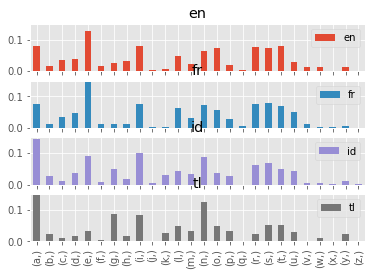

In [61]:
# lang-plot.py  # 173페이지
import matplotlib.pyplot as plt
import pandas as pd
import json
# 알파벳 출현 빈도 데이터 읽어 들이기 --- (※1)
with open("./lang/freq.json", "r", encoding="utf-8") as fp:
    freq = json.load(fp)
# 언어마다 계산하기 --- (※2)
lang_dic = {}
for i, lbl in enumerate(freq[0]["labels"]):
    fq = freq[0]["freqs"][i]
    if not (lbl in lang_dic):
        lang_dic[lbl] = fq
        continue
    for idx, v in enumerate(fq):
        lang_dic[lbl][idx] = (lang_dic[lbl][idx] + v) / 2
# Pandas의 DataFrame에 데이터 넣기 --- (※3)
asclist = [[chr(n) for n in range(97,97+26)]]
df = pd.DataFrame(lang_dic, index=asclist)
# 그래프 그리기 --- (※4)
plt.style.use('ggplot')
df.plot(kind="bar", subplots=True, ylim=(0,0.15))
plt.show()
# plt.savefig("lang-plot.png")

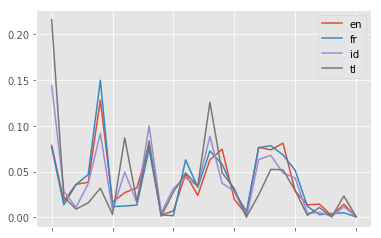

In [62]:
# lang-plot.py  # 176페이지
import matplotlib.pyplot as plt
import pandas as pd
import json
# 알파벳 출현 빈도 데이터 읽어 들이기 --- (※1)
with open("./lang/freq.json", "r", encoding="utf-8") as fp:
    freq = json.load(fp)
# 언어마다 계산하기 --- (※2)
lang_dic = {}
for i, lbl in enumerate(freq[0]["labels"]):
    fq = freq[0]["freqs"][i]
    if not (lbl in lang_dic):
        lang_dic[lbl] = fq
        continue
    for idx, v in enumerate(fq):
        lang_dic[lbl][idx] = (lang_dic[lbl][idx] + v) / 2
# Pandas의 DataFrame에 데이터 넣기 --- (※3)
asclist = [[chr(n) for n in range(97,97+26)]]
df = pd.DataFrame(lang_dic, index=asclist)
# 그래프 그리기 --- (※4)
plt.style.use('ggplot')
df.plot(kind="line")
plt.show()

In [57]:
# lang-train-save.py  # 177페이지
from sklearn import svm 
from sklearn.externals import joblib
import json
# 각 언어의 출현 빈도 데이터(JSON) 읽어 들이기
with open("./lang/freq.json", "r", encoding="utf-8") as fp:
    d = json.load(fp)
    data = d[0]
# 데이터 학습하기
clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])
print(clf)
# 학습 데이터 저장하기
joblib.dump(clf, "./lang/freq.pkl")
print("ok")

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
ok


In [58]:
from sklearn.externals import joblib
# 학습 데이터 읽어 들이기
clf = joblib.load("./lang/freq.pkl")
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
# 184페이지
%run bmi-create.py

ok, {'thin': 6380, 'normal': 5928, 'fat': 7692}


In [64]:
# bmi-test.py  # 185페이지
import time
startTime = time.time()

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
# 키와 몸무게 데이터 읽어 들이기 --- (※1)
tbl = pd.read_csv("bmi.csv")
# 칼럼(열)을 자르고 정규화하기 --- (※2)
label = tbl["label"]
w = tbl["weight"] / 100 # 최대 100kg라고 가정
h = tbl["height"] / 200 # 최대 200cm라고 가정
wh = pd.concat([w, h], axis=1)
# 학습 전용 데이터와 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = train_test_split(wh, label)
# 데이터 학습하기 --- (※4)
clf = svm.SVC()
clf.fit(data_train, label_train)
# 데이터 예측하기 --- (※5)
predict = clf.predict(data_test)
# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

endTime = time.time() - startTime
print("실행에 소요된 시간=", endTime, '초')
if endTime / 60 > 1: print( endTime/60, '분')

정답률 = 0.9868
리포트 =
              precision    recall  f1-score   support

        fat       1.00      0.99      1.00      1919
     normal       0.96      1.00      0.98      1488
       thin       1.00      0.97      0.98      1593

avg / total       0.99      0.99      0.99      5000

실행에 소요된 시간= 1.5782966613769531 초


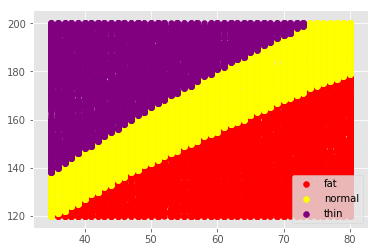

In [67]:
# bmi-plot.py  # 187페이지
import matplotlib.pyplot as plt
import pandas as pd
# Pandas로 CSV 파일 읽어 들이기
tbl = pd.read_csv("bmi.csv", index_col=2)
# 그래프 그리기 시작
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# 서브 플롯 전용 - 지정한 레이블을 임의의 색으로 칠하기
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"],b["height"], c=color, label=lbl)
scatter("fat",    "red")
scatter("normal", "yellow")
scatter("thin",   "purple")
ax.legend() 
# plt.savefig("bmi-test.png")
plt.show()

In [68]:
# scikit-learn에서는 3가지 종류의 SVC를 지원 : SVC, NuSVC, LinearSVC
# SVC와 NuSVC는 표준적으로 구현된 SVM. 오류 처리 방법이 약간 다르지만 수학적으로는 같다.
# LinearSVC는 선형 커널 특화된 SVM으로 계산이 빠르며, 다양한 옵션을 가지고 있다.
# clf = svm.SVC() 를 clf = svm.LinearSVC() 로 변경해서 학습
#  : 정답률은 약간 떨어지지만 속도는 더 빠름!
# 188페이지
import time
startTime = time.time()

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
# 키와 몸무게 데이터 읽어 들이기 --- (※1)
tbl = pd.read_csv("bmi.csv")
# 칼럼(열)을 자르고 정규화하기 --- (※2)
label = tbl["label"]
w = tbl["weight"] / 100 # 최대 100kg라고 가정
h = tbl["height"] / 200 # 최대 200cm라고 가정
wh = pd.concat([w, h], axis=1)
# 학습 전용 데이터와 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = train_test_split(wh, label)
# 데이터 학습하기 --- (※4)
# clf = svm.SVC()
clf = svm.LinearSVC()
clf.fit(data_train, label_train)
# 데이터 예측하기 --- (※5)
predict = clf.predict(data_test)
# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

endTime = time.time() - startTime
print("실행에 소요된 시간=", endTime, '초')
if endTime / 60 > 1: print( endTime/60, '분')

정답률 = 0.9172
리포트 =
              precision    recall  f1-score   support

        fat       0.89      1.00      0.94      1916
     normal       0.99      0.72      0.84      1468
       thin       0.91      1.00      0.95      1616

avg / total       0.93      0.92      0.91      5000

실행에 소요된 시간= 0.1264340877532959 초


In [69]:
%run mushroom-download.py

ok


In [70]:
import pandas as pd
mr = pd.read_csv("mushroom.csv", header=None)
mr.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [71]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.random(200).reshape(2, 100))
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.549208,0.805273,0.072438,0.365653,0.192965,0.451535,0.609291,0.233039,0.950344,0.028531,...,0.738677,0.571545,0.921517,0.105865,0.899801,0.454085,0.255543,0.523024,0.158310,0.558787
1,0.199790,0.431032,0.211950,0.273757,0.870175,0.340306,0.592749,0.277819,0.854378,0.560342,...,0.984075,0.180742,0.328758,0.519142,0.618551,0.712040,0.302867,0.284638,0.681513,0.188041


In [72]:
# set up display area to show dataframe in jupyter qtconsole

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.549208,0.805273,0.072438,0.365653,0.192965,0.451535,0.609291,0.233039,0.950344,0.028531,0.340752,0.288542,0.770051,0.776031,0.064439,0.429402,0.060650,0.792816,0.665653,0.967102,0.918536,0.993765,0.146506,0.379806,0.485233,0.452531,0.040339,0.193039,0.718413,0.511406,0.654612,0.703120,0.00020,0.835702,0.921849,0.740816,0.150302,0.727954,0.924389,0.609063,0.621538,0.727393,0.964190,0.532608,0.725866,0.112636,0.137254,0.569056,0.403341,0.398285,0.192066,0.582690,0.565708,0.507733,0.761194,0.637279,0.132109,0.395121,0.734662,0.115098,0.033095,0.746950,0.156302,0.995649,0.859583,0.579316,0.567384,0.361034,0.763061,0.546667,0.648639,0.079584,0.502479,0.223833,0.059124,0.881169,0.490040,0.924016,0.526701,0.034070,0.081251,0.163359,0.209157,0.785423,0.73261,0.976410,0.844879,0.432876,0.915308,0.493025,0.738677,0.571545,0.921517,0.105865,0.899801,0.454085,0.255543,0.523024,0.158310,0.558787
1,0.199790,0.431032,0.211950,0.273757,0.870175,0.340306,0.592749,0.277819,0.854378,0.560342,0.931926,0.607193,0.707005,0.139355,0.232750,0.046709,0.633272,0.768309,0.259826,0.287585,0.706891,0.641501,0.974876,0.067999,0.228228,0.928887,0.202061,0.633034,0.468005,0.865917,0.521317,0.009844,0.17509,0.698976,0.617858,0.338648,0.322928,0.171098,0.384789,0.117301,0.696537,0.663575,0.434075,0.086373,0.846285,0.885072,0.480069,0.166832,0.639990,0.573955,0.908633,0.174732,0.612900,0.627720,0.702686,0.907346,0.421961,0.152384,0.594058,0.841580,0.057499,0.277206,0.567126,0.265098,0.679249,0.954304,0.788987,0.486057,0.728152,0.418601,0.073890,0.183956,0.091757,0.817764,0.694031,0.773962,0.379304,0.088465,0.383404,0.951639,0.545608,0.532263,0.817680,0.204752,0.36681,0.737351,0.559392,0.021661,0.761776,0.306189,0.984075,0.180742,0.328758,0.519142,0.618551,0.712040,0.302867,0.284638,0.681513,0.188041


In [78]:
import pandas as pd
pd.set_option('display.max_columns', 100)
mr = pd.read_csv("mushroom.csv", header=None)
mr.head()
# 가장 왼쪽 열(0)이 독의 유무 : 독이 있으면 p(poisonous), 식용이면 e(edible)
# 두 번째 열(1)은 버섯의 머리 모양 : 벨(b), 원뿔(c), 볼록(x), 평평(f), 혹(k), 오목(s)
# 네 번째 열(3)은 버섯의 머리 색 : 갈색(n), 황갈색(b), 연한 갈색(c), 회색(g), 녹색(r), 분홍색(p), 보라색(u), 붉은색(e), 흰색(w), 노란색(y)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [81]:
# mushroom-train.py  # 193페이지
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
# 데이터 읽어 들이기--- (※1)
mr = pd.read_csv("mushroom.csv", header=None)
# 데이터 내부의 기호를 숫자로 변환하기--- (※2)
label = []
data = []
attr_list = []
# DeprecationWarning: .ix is deprecated. Please use .loc for label based indexing or .iloc for positional indexing
for row_index, row in mr.iterrows():
#     label.append(row.ix[0])
    label.append(row.loc[0])
    row_data = []
#     for v in row.ix[1:]:  # <--- DeprecationWarning
#         row_data.append(ord(v))
    for v in row.loc[1:]:
        row_data.append(ord(v))
    data.append(row_data)

# 학습 전용과 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = train_test_split(data, label)
# 데이터 학습시키기 --- (※4)
clf = RandomForestClassifier()
clf.fit(data_train, label_train)
# 데이터 예측하기 --- (※5)
predict = clf.predict(data_test)
# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 1.0
리포트 =
              precision    recall  f1-score   support

          e       1.00      1.00      1.00      1037
          p       1.00      1.00      1.00       994

avg / total       1.00      1.00      1.00      2031



In [84]:
# mushroom-train2.py
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
# 데이터 읽어 들이기
mr = pd.read_csv("mushroom.csv", header=None)
# 데이터 내부의 분류 변수 전개하기
label = []
data = []
attr_list = []
# DeprecationWarning: .ix is deprecated. Please use .loc for label based indexing or .iloc for positional indexing
for row_index, row in mr.iterrows():
#     label.append(row.ix[0])
    label.append(row.loc[0])
    exdata = []
#     for col, v in enumerate(row.ix[1:]):
    for col, v in enumerate(row.loc[1:]):
        if row_index == 0:
            attr = {"dic": {}, "cnt":0}
            attr_list.append(attr)
        else:
            attr = attr_list[col]
        # 버섯의 특징 기호를 배열로 나타내기
        d = [0,0,0,0,0,0,0,0,0,0,0,0]
        if v in attr["dic"]:
            idx = attr["dic"][v]
        else:
            idx = attr["cnt"]
            attr["dic"][v] = idx
            attr["cnt"] += 1
        d[idx] = 1
        exdata += d
    data.append(exdata)
# 학습 전용 데이터와 테스트 전용 데이터로 나누기
data_train, data_test, label_train, label_test = train_test_split(data, label)
# 데이터 학습시키기
clf = RandomForestClassifier()
clf.fit(data_train, label_train)
# 데이터 예측하기
predict = clf.predict(data_test)
# 결과 테스트하기
ac_score = metrics.accuracy_score(label_test, predict)
print("정답률 =", ac_score)

정답률 = 1.0


In [86]:
# cross-iris.py  # 199페이지
# 크로스 밸리데이션(교차 검증) : 많은 방법이 있음.
# 예) K 분할 교차 검증(K-fold cross validation)
# 예를 들어 집합 X를 3개로 분할해 A,B,C로 만든 경우
# 1. 집합 X를 A, B, C로 분할
# 2. A를 테스트 전용 데이터, 나머지 B,C를 훈련 전용 데이터로 사용해 정밀도 s1을 구함.
# 3. B를 테스트 전용 데이터, 나머지 A,C를 훈련 전용 데이터로 사용해 정밀도 s2을 구함.
# 4. C를 테스트 전용 데이터, 나머지 A,B를 훈련 전용 데이터로 사용해 정밀도 s3을 구함.
# 5. 분류 정밀도 s1,s2,s3의 평균을 구해 최종적인 분류 정밀도를 구함.
from sklearn import svm, metrics
import random, re
# 붓꽃의 CSV 파일 읽어 들이기 --- (※1)
lines = open('iris.csv', 'r', encoding='utf-8').read().split("\n")
f_tonum = lambda n : float(n) if re.match(r'^[0-9\.]+$', n) else n
f_cols  = lambda li: list(map(f_tonum,li.strip().split(',')))
csv = list(map(f_cols, lines))
del csv[0] # 헤더 제거하기
random.shuffle(csv) # 데이터 섞기
# 데이터를 K개로 분할하기 --- (※2)
K = 5 
csvk = [ [] for i in range(K) ]
for i in range(len(csv)):
    csvk[i % K].append(csv[i])
# 리스트를 훈련 전용 데이터와 테스트 전용 데이터로 분할하는 함수
def split_data_label(rows):
    data = []; label = []
    for row in rows:
        data.append(row[0:4])
        label.append(row[4])
    return (data, label)
# 정답률 구하기 --- (※3)
def calc_score(test, train):
    test_f, test_l = split_data_label(test)
    train_f, train_l = split_data_label(train)
    # 학습시키고 정답률 구하기
    clf = svm.SVC()
    clf.fit(train_f, train_l)
    pre = clf.predict(test_f)
    return metrics.accuracy_score(test_l, pre)
# K개로 분할해서 정답률 구하기 --- (※4)
score_list = []
for testc in csvk:
    # testc 이외의 데이터를 훈련 전용 데이터로 사용하기
    trainc = []
    for i in csvk:
        if i != testc: trainc += i
    sc = calc_score(testc, trainc)
    score_list.append(sc)
print("각각의 정답률 =", score_list)
print("평균 정답률 =", sum(score_list) / len(score_list))

각각의 정답률 = [0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 0.9666666666666667]
평균 정답률 = 0.9800000000000001


In [87]:
# cross-iris2.py  # 200페이지
import pandas as pd
from sklearn import svm, metrics, model_selection
import random, re
# 붓꽃의 CSV 데이터 읽어 들이기 --- (※1)
csv = pd.read_csv('iris.csv')
# 리스트를 훈련 전용 데이터와 테스트 전용 데이터로 분할하기 --- (※2)
data = csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
label = csv["Name"]
# 크로스 밸리데이션하기 --- (※3)
clf = svm.SVC()
scores = model_selection.cross_val_score(clf, data, label, cv=5)
print("각각의 정답률 =", scores)
print("평균 정답률 =", scores.mean())

각각의 정답률 = [0.96666667 1.         0.96666667 0.96666667 1.        ]
평균 정답률 = 0.9800000000000001


In [91]:
# grid-mnist.py  # 202페이지
# 매개변수 튜닝 방법 중 하나인 그리드 서치
# 각 매개 변수를 적당한 범위 내부에서 변경하면서 가장 성능이 좋은 때의 값을 찾는 방법.
# 1000 개의 데이터만 학습할 때 튜닝 전에는 0.786(78.6%)에서
# 튜닝 후에는 정답률 = 0.866(86.6%)로 올라감!
import pandas as pd
from sklearn import model_selection, svm, metrics
from sklearn.grid_search import GridSearchCV
# MNIST 학습 데이터 읽어 들이기 --- (※1)
train_csv = pd.read_csv("./mnist/train_1000.csv")
test_csv  = pd.read_csv("./mnist/t10k_500.csv")
# 필요한 열 추출하기 --- (※2)
train_label = train_csv.iloc[:, 0]
train_data  = train_csv.iloc[:, 1:577]
test_label  = test_csv.iloc[:, 0]
test_data   = test_csv.iloc[:, 1:577]
print("학습 데이터의 수 =", len(train_label))
# 그리드 서치 매개변수 설정 --- (※3)
params = [
    {"C": [1,10,100,1000], "kernel":["linear"]},
    {"C": [1,10,100,1000], "kernel":["rbf"], "gamma":[0.001, 0.0001]}
]
# 그리드 서치 수행 --- (※4)
clf = GridSearchCV( svm.SVC(), params, n_jobs=-1 )
clf.fit(train_data, train_label)
print("학습기 =", clf.best_estimator_)
# 테스트 데이터 확인하기 --- (※5)
pre = clf.predict(test_data)
ac_score = metrics.accuracy_score(pre, test_label)
print("정답률 =",ac_score)

학습 데이터의 수 = 1000
학습기 = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
정답률 = 0.866
